
# <center> Adults Book  </center>

# Problem Statement 


 
Sites and libraries are full of adult-oriented books, but adults find it difficult to choose the right choice for their passion.The recommendation system helped adults to find the best authers and books in their passion based on several things so lets Find how ?
Dataset Description



#### This data was acquired from goodreads website.and the dataset from Kaggel


https://www.kaggle.com/rawanalmalki/goodreads-dataset

## Importing packages


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plti
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [3]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Loading the Book Dataset

In [4]:
bk = pd.read_csv('./df_books.csv')

## Exploring the Data

In [5]:
bk.head()

,Unnamed: 0,title_book,title_series_book,author_name,has_series,series_number,avg_rating,total_rating,voters,score
0,0,The Hunger Games,The Hunger Games,Suzanne Collins,True,1,4.33,6086305,196,9286
1,1,Catching Fire,The Hunger Games,Suzanne Collins,True,2,4.29,2360261,138,3376
2,2,Mockingjay,The Hunger Games,Suzanne Collins,True,3,4.04,2217517,99,9442
3,3,Divergent,Divergent,Veronica Roth,True,1,4.20,2767407,97,9119
4,4,Vampire Academy,Vampire Academy,Richelle Mead,True,1,4.13,7029,86,8292


In [6]:
bk.tail()

,Unnamed: 0,title_book,title_series_book,author_name,has_series,series_number,avg_rating,total_rating,voters,score
1295,1295,Lament: The Faerie Queen's Deception,Books of Faerie,Maggie Stiefvater,True,1,3.67,1207,2,0
1296,1296,Parrotfish,NaN,Ellen Wittlinger,False,0,3.71,5671,1,0
1297,1297,Travels with Gannon and Wyatt: Great Bear Rain...,NaN,Patti Wheeler,False,0,4.19,0,1,0
1298,1298,United We Spy,Gallagher Girls,Ally Carter,True,6,4.44,9093,1,0
1299,1299,Speak,NaN,Laurie Halse Anderson,False,0,4.02,2193,1,0


In [7]:
bk.shape

(1300, 10)

In [8]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 10 columns):
Unnamed: 0           1300 non-null int64
title_book           1296 non-null object
title_series_book    812 non-null object
author_name          1300 non-null object
has_series           1300 non-null bool
series_number        1300 non-null int64
avg_rating           1300 non-null float64
total_rating         1300 non-null int64
voters               1300 non-null int64
score                1300 non-null int64
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 92.8+ KB


In [9]:
bk.columns

Index(['Unnamed: 0', 'title_book', 'title_series_book', 'author_name',
       'has_series', 'series_number', 'avg_rating', 'total_rating', 'voters',
       'score'],
      dtype='object')

### Check Missing Values

In [10]:
missing= bk.isnull().sum().sort_values(ascending=False)
percentage = (bk.isnull().sum()/ bk.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, percentage], axis=1, keys=['Missing', '%'])
missing_data.head(8) #  title_series_book dont need it 

,Missing,%
title_series_book,488,0.375385
title_book,4,0.003077
score,0,0.000000
voters,0,0.000000
total_rating,0,0.000000
avg_rating,0,0.000000
series_number,0,0.000000
has_series,0,0.000000


# visualize the location of missing values
 

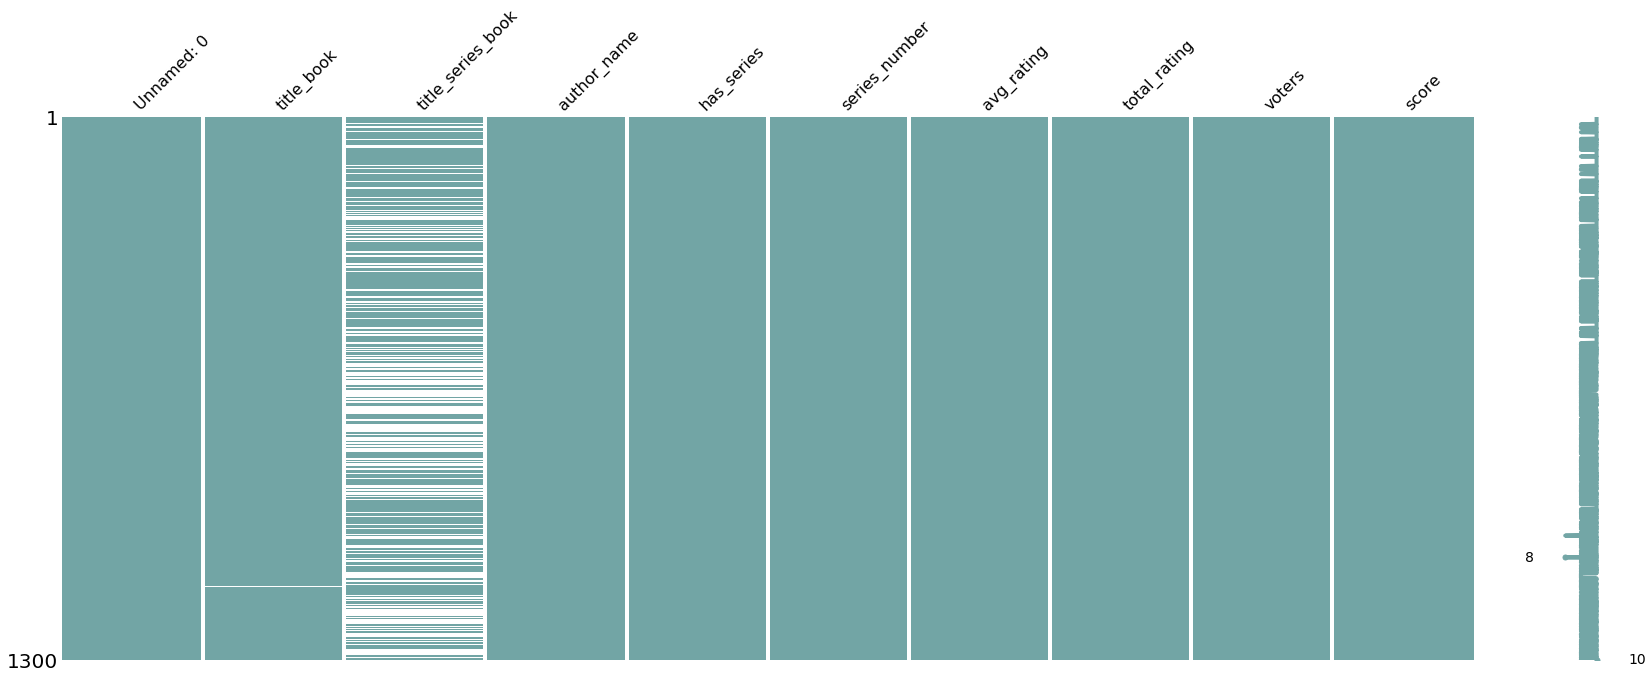

In [11]:
msno.matrix(bk,color=(0.45, 0.65, 0.65))

###  Check Duplicated Values

In [12]:
duplicateRowsDF = bk[bk.duplicated()]

In [13]:
duplicateRowsDF

,Unnamed: 0,title_book,title_series_book,author_name,has_series,series_number,avg_rating,total_rating,voters,score


# The correlations

<function matplotlib.pyplot.show(*args, **kw)>

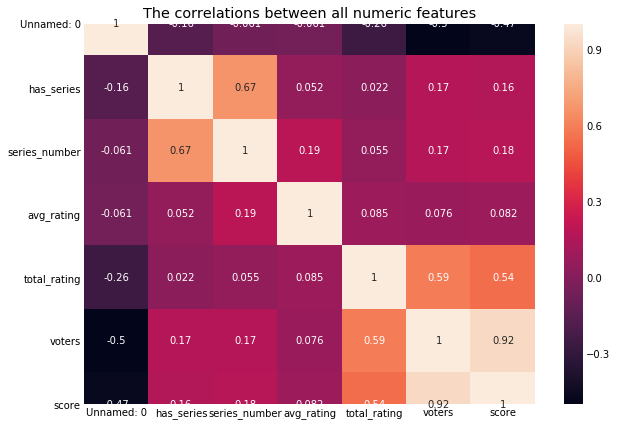

In [18]:
fig=plt.figure(figsize=(9,7))
ax = fig.gca()
sns.heatmap(bk.corr(), annot=True,ax=ax)
ax.set_title('The correlations between all numeric features')
palette = sns.diverging_palette(80, 110, n=146)
plt.show

## Cleaning Data 

# Book

- ### A- title_book

In [19]:
bk['title_series_book'] =bk['title_series_book'].str.replace('.','')
bk['title_series_book'] =bk['title_series_book'].str.replace('&','and')
bk['title_series_book'] =bk['title_series_book'].str.replace('-','')
bk['title_series_book'] =bk['title_series_book'].str.replace(',','')
bk['title_series_book'] =bk['title_series_book'].str.replace(';','')
bk['title_series_book'] =bk['title_series_book'].str.replace(':','')
bk['title_series_book'] =bk['title_series_book'].str.replace('?','')

# B- title_series_book	


In [20]:
bk['title_book'] =bk['title_book'].str.replace('.','')
bk['title_book'] =bk['title_book'].str.replace('&','and')
bk['title_book'] =bk['title_book'].str.replace('-','')
bk['title_book'] =bk['title_book'].str.replace(',','')
bk['title_book'] =bk['title_book'].str.replace(';','')
bk['title_book'] =bk['title_book'].str.replace(':','')
bk['title_book'] =bk['title_book'].str.replace('?','')
bk['title_book'] =bk['title_book'].str.replace('/','')

In [21]:
bk.title_book.unique()

array(['The Hunger Games ', 'Catching Fire ', 'Mockingjay ', ...,
       'Travels with Gannon and Wyatt Great Bear Rainforest',
       'United We Spy ', 'Speak'], dtype=object)

In [22]:
del bk['Unnamed: 0']

# fill the missing value


In [23]:
bk.loc[(bk.index==1123),'title_book']='Space Odyssey'
bk.loc[(bk.index==344),'title_book']='13 to Life'


In [24]:
# drop rows  Alison Croggon
bk.drop(index=bk.index[[1001, 1053]])

,title_book,title_series_book,author_name,has_series,series_number,avg_rating,total_rating,voters,score
0,The Hunger Games,The Hunger Games,Suzanne Collins,True,1,4.33,6086305,196,9286
1,Catching Fire,The Hunger Games,Suzanne Collins,True,2,4.29,2360261,138,3376
2,Mockingjay,The Hunger Games,Suzanne Collins,True,3,4.04,2217517,99,9442
3,Divergent,Divergent,Veronica Roth,True,1,4.20,2767407,97,9119
4,Vampire Academy,Vampire Academy,Richelle Mead,True,1,4.13,7029,86,8292
5,Harry Potter and the Deathly Hallows,Harry Potter,J.K. Rowling,True,7,4.62,2656673,86,8066
6,Clockwork Angel,The Infernal Devices,Cassandra Clare,True,1,4.33,4635,77,7374
7,Harry Potter and the Goblet of Fire,Harry Potter,J.K. Rowling,True,4,4.56,2423434,72,6674
8,Hush Hush,Hush Hush,Becca Fitzpatrick,True,1,3.98,5976,66,6382
9,Harry Potter and the HalfBlood Prince,Harry Potter,J.K. Rowling,True,6,4.57,2295705,69,6343


# convert type to str

In [25]:
bk['title_book']=bk['title_book'].astype('str')
bk['title_book'].dtype

dtype('O')

In [26]:
bk['title_series_book']=bk['title_series_book'].astype('str')
bk['title_series_book'].dtype

dtype('O')

### Making Lowercase

In [27]:
bk['title_book']=bk['title_book'].apply(lambda x:x.lower())
bk['title_series_book']=bk['title_series_book'].apply(lambda x:x.lower())
bk['author_name']=bk['author_name'].apply(lambda x:x.lower())

In [141]:
#bk['title_book'].head()

# Visualization

In [31]:
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plti
import missingno as msno 
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

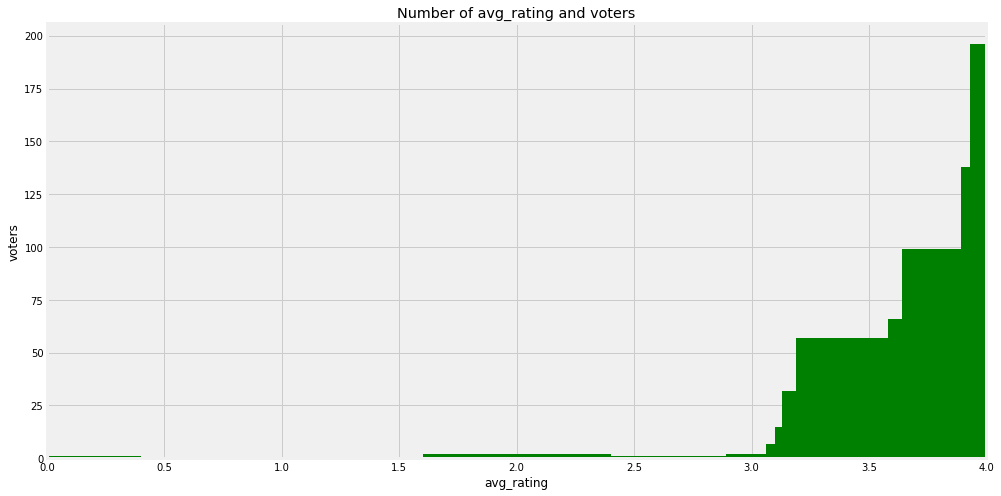

In [36]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
plt.bar(bk.avg_rating,bk.voters, alpha=1, color= 'g',)
ax.set(xlim=(0, 4))
plt.xlabel('avg_rating')
plt.ylabel('voters')
plt.title('Number of avg_rating and voters')
plt.show

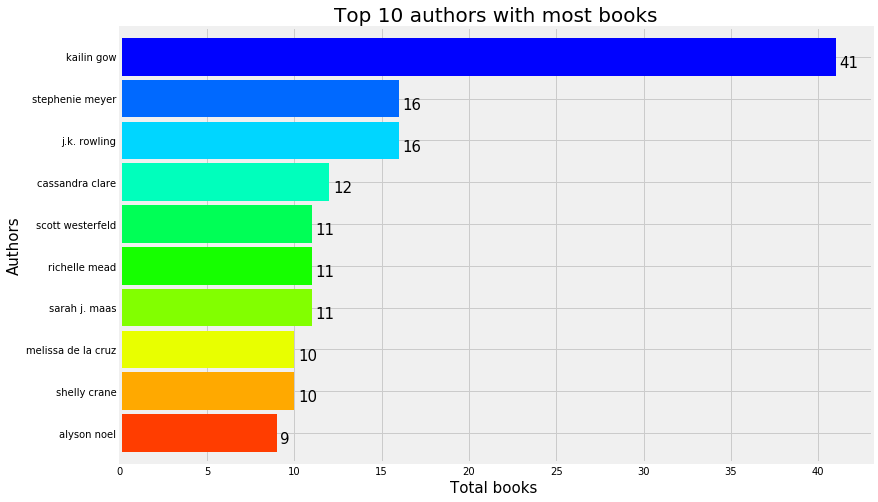

In [34]:
author_of_most_books = bk.groupby('author_name')['title_book'].count().reset_index().sort_values('title_book',ascending=False).head(10).set_index('author_name')
plt.subplots(figsize=(12,8))
ax = author_of_most_books['title_book'].sort_values().plot.barh(width=0.9,color=sns.color_palette('gist_rainbow',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 authors with most books",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [35]:
bk.loc[(bk.author_name == 'kailin gow')].count()

title_book           41
title_series_book    41
author_name          41
has_series           41
series_number        41
avg_rating           41
total_rating         41
voters               41
score                41
dtype: int64

C:\Users\omar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


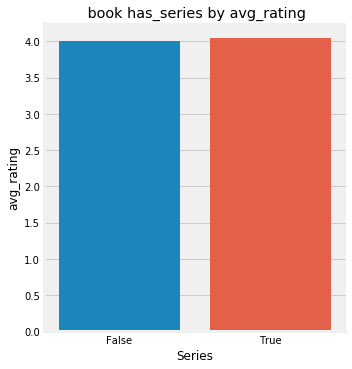

In [36]:
# Plot showing avg of _rating  by Series
sns.factorplot(y='avg_rating', x='has_series', data=bk, kind='bar', ci=None)
plt.xlabel('Series')
plt.ylabel('avg_rating')
plt.title(' book has_series by avg_rating')
plt.show()

## Recommending

In [37]:
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [124]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title_book, author_name):
    
    # Matching the genre with the dataset and reset the index
    data = bk.loc[bk['author_name'] == author_name]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title_book'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1)
    #tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['title_book'])
    
#     tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
#     tfidf_matrix = tf.fit_transform(data['title'])
    
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title_book]
# Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
# Sort the books
   # sig = sorted(sig, key=lambda x: x[0], reverse=True)
    sig = sorted(sig, key=lambda x: x[0], reverse=True)
# Scores of the 5 most similar books 
    sig = sig[0:6]
    #sig = sig[0:]
# Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['title_book']].iloc[movie_indices]
       

    return rec

In [125]:
print(len(bk))
print(len(bk.title_book.notna()))

1300
1300


In [126]:
print(len(bk))
print(len(bk[bk.title_book.notna()]))

1300
1300


In [129]:
print(recommend('immortal darkness ','kailin gow'))

               title_book
40         dark memories 
39         forever frost 
38          life's blood 
37  daughters of dracula 
36      dark beginnings  
35                desire 


In [123]:
print(recommend('midnight sun ','stephenie meyer'))

  title_book
1  the host 
0  twilight 


In [136]:
print(recommend('harry potter and the halfblood prince ','j.k. rowling'))

                              title_book
1   harry potter and the goblet of fire 
0  harry potter and the deathly hallows 


In [138]:
print(recommend('clockwork princess ','cassandra clare'))

                                           title_book
11                                clockwork princess 
10                                city of lost souls 
9                                   clockwork prince 
8   the mortal instruments boxed set city of bones...
7                              city of fallen angels 
6                                      city of bones 


In [139]:
print(recommend('goliath ','scott westerfeld'))

          title_book
10         behemoth 
9           goliath 
8     the last days 
7         leviathan 
6             peeps 
5   the secret hour 
